period length is  396


Model error estimate without ENKF:   0%|          | 0/30 [00:00<?, ?it/s]c:\Users\yoswald\Dropbox\Arbeit\postdoc_leeds\real_time_ineq_abm\rtabm\model1_class.py:272: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(['0%', '0%', '20%', '40%', '60%', '80%'])
c:\Users\yoswald\Dropbox\Arbeit\postdoc_leeds\real_time_ineq_abm\rtabm\model2_class.py:194: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(['0%', '0%', '20%', '40%', '60%', '80%'])
Model error estimate without ENKF:   3%|▎         | 1/30 [00:05<02:31,  5.21s/it]c:\Users\yoswald\Dropbox\Arbeit\postdoc_leeds\real_time_ineq_abm\rtabm\model1_class.py:272: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(['0%', '0%', '20%', '40%', '60%', '80%'

(396, 4)
(396, 4)
this is data vector [[0.28628868 0.36080472 0.33442173 0.01848487]
 [0.28581432 0.36113329 0.3347986  0.01825377]
 [0.28561731 0.36136464 0.33496598 0.01805208]
 ...
 [0.34502427 0.34944692 0.29658986 0.00893895]
 [0.34880103 0.34820548 0.29410659 0.0088869 ]
 [0.34413446 0.35030326 0.29692774 0.00863453]]
(396, 4)
(396, 4)
this is data vector [[0.28628868 0.36080472 0.33442173 0.01848487]
 [0.28581432 0.36113329 0.3347986  0.01825377]
 [0.28561731 0.36136464 0.33496598 0.01805208]
 ...
 [0.34502427 0.34944692 0.29658986 0.00893895]
 [0.34880103 0.34820548 0.29410659 0.0088869 ]
 [0.34413446 0.35030326 0.29692774 0.00863453]]
(396, 4)
(396, 4)
this is data vector [[0.28628868 0.36080472 0.33442173 0.01848487]
 [0.28581432 0.36113329 0.3347986  0.01825377]
 [0.28561731 0.36136464 0.33496598 0.01805208]
 ...
 [0.34502427 0.34944692 0.29658986 0.00893895]
 [0.34880103 0.34820548 0.29410659 0.0088869 ]
 [0.34413446 0.35030326 0.29692774 0.00863453]]
(396, 4)
(396, 4)
this

c:\Users\yoswald\Dropbox\Arbeit\postdoc_leeds\real_time_ineq_abm\rtabm\model2_class.py:194: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(['0%', '0%', '20%', '40%', '60%', '80%'])
C:\Users\yoswald\AppData\Local\Temp\ipykernel_22472\2098956525.py:82: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_yticklabels(['0%', '20%', '40%', '60%', '80%', '100%'])
C:\Users\yoswald\AppData\Local\Temp\ipykernel_22472\2098956525.py:86: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax3.set_yticklabels(['0%', '20%', '40%', '60%', '80%', '100%'])


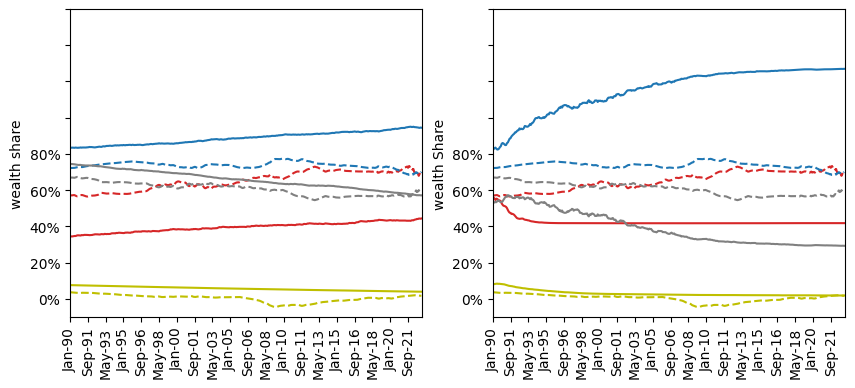

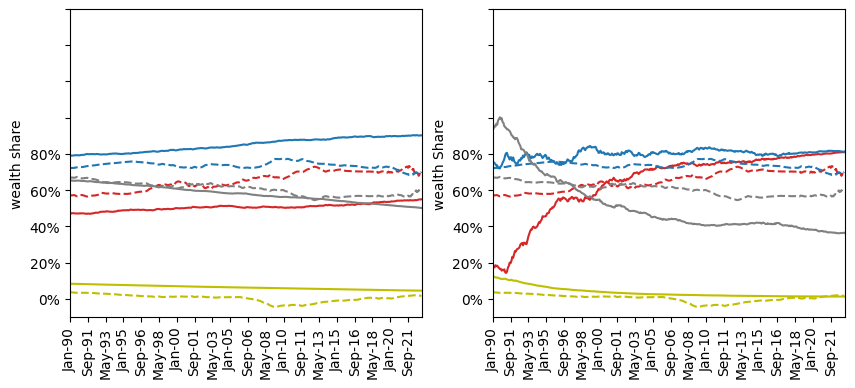

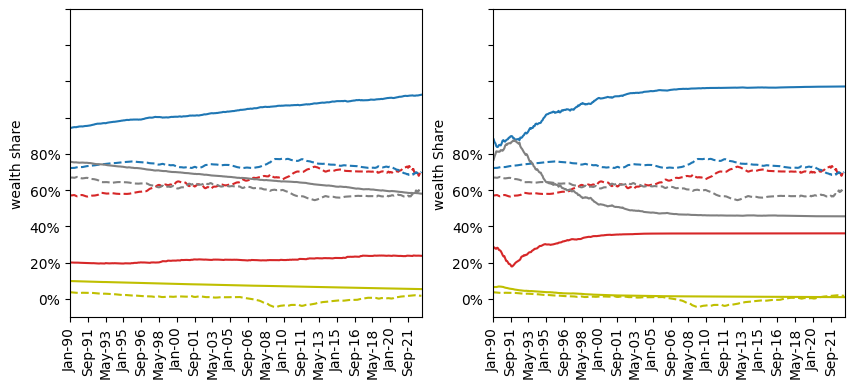

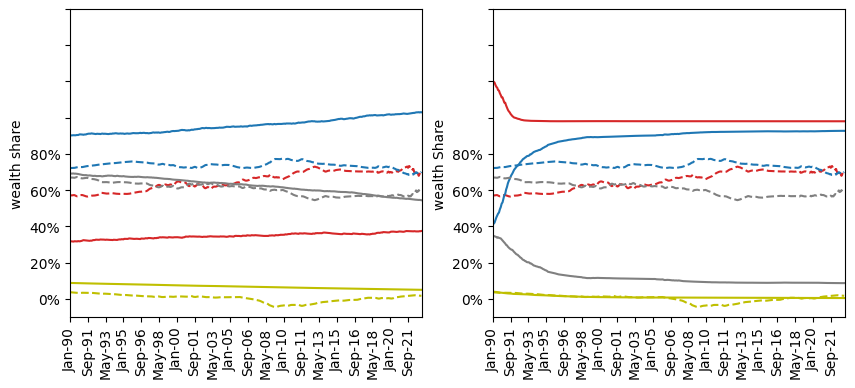

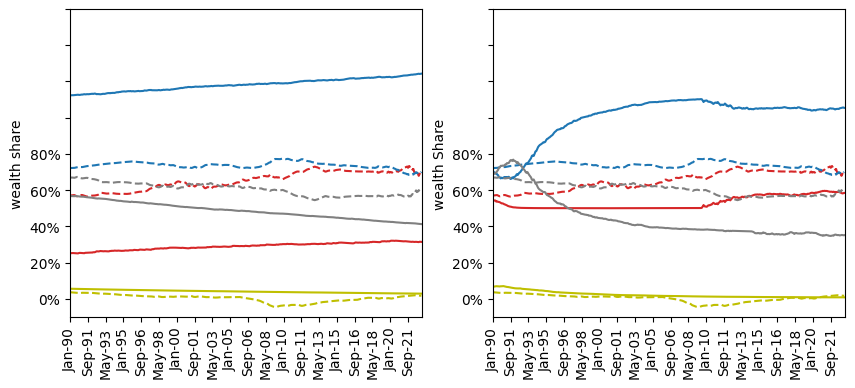

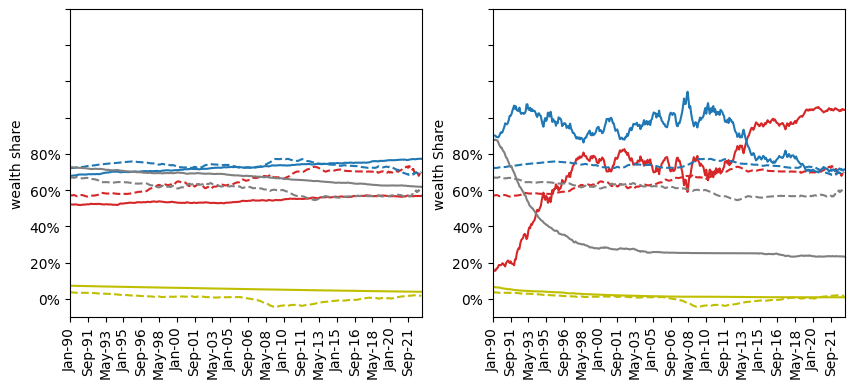

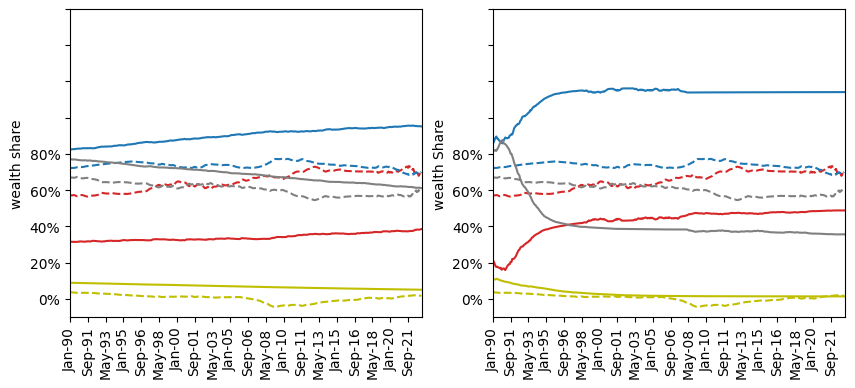

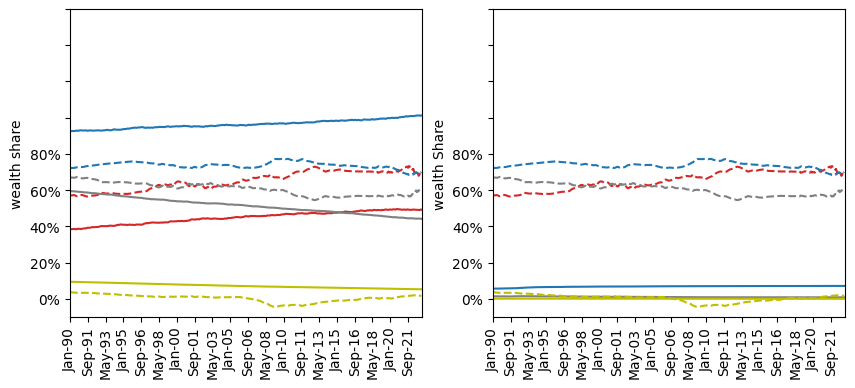

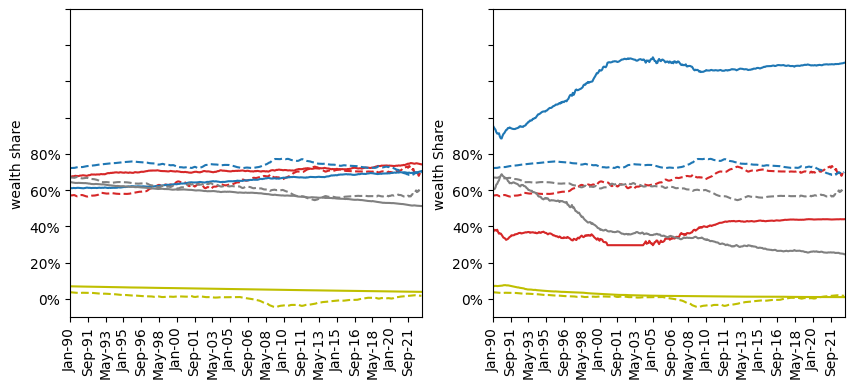

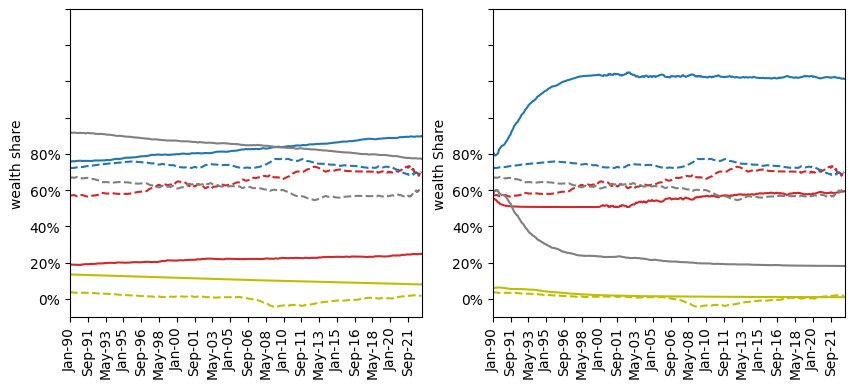

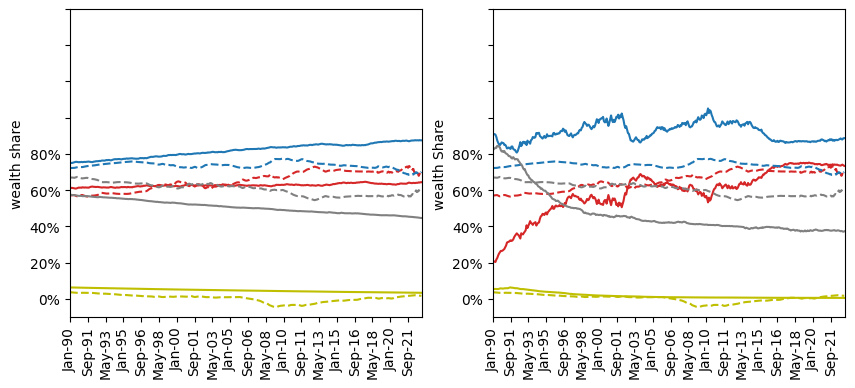

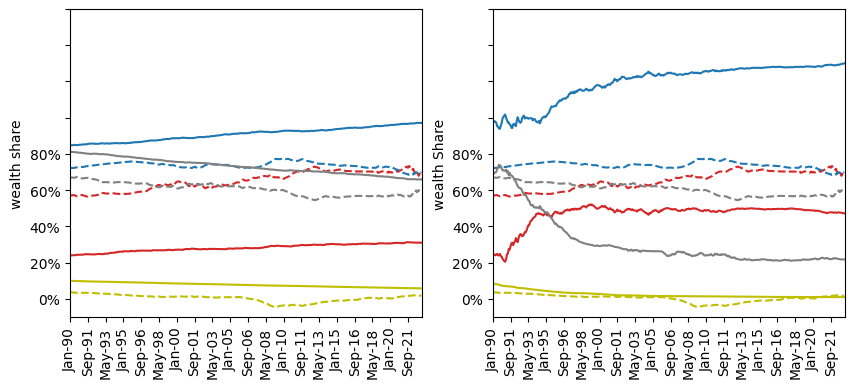

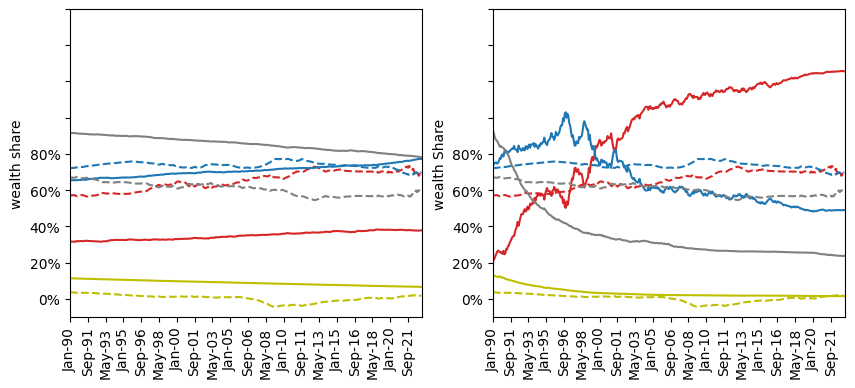

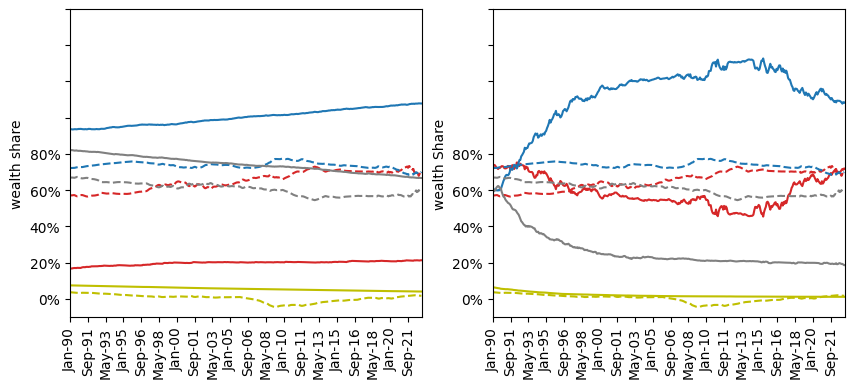

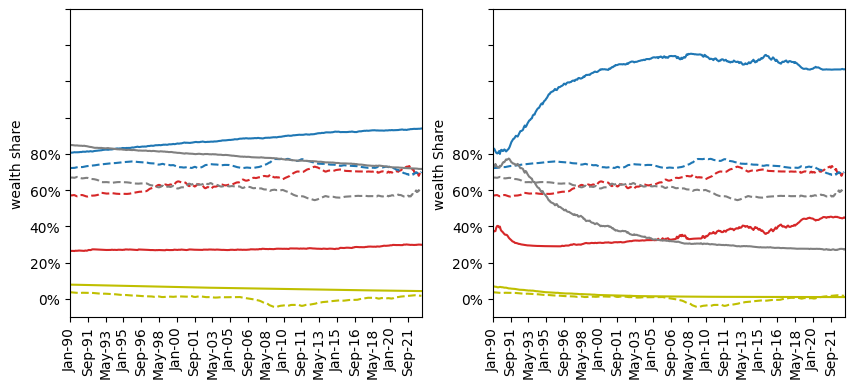

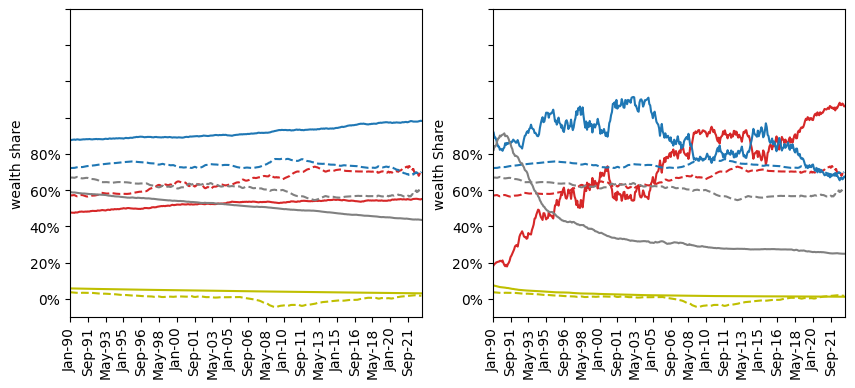

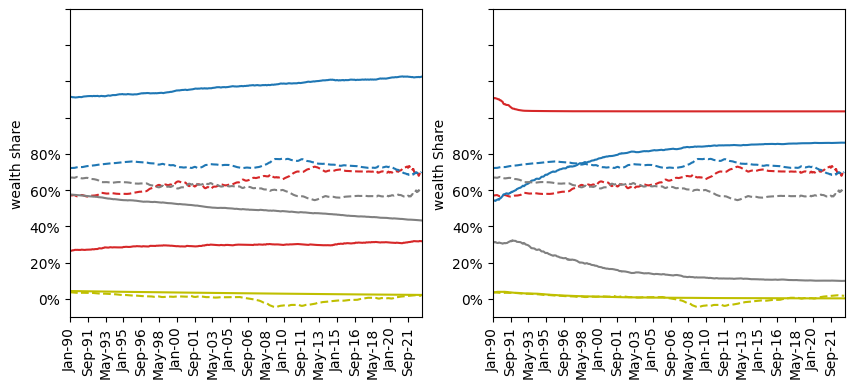

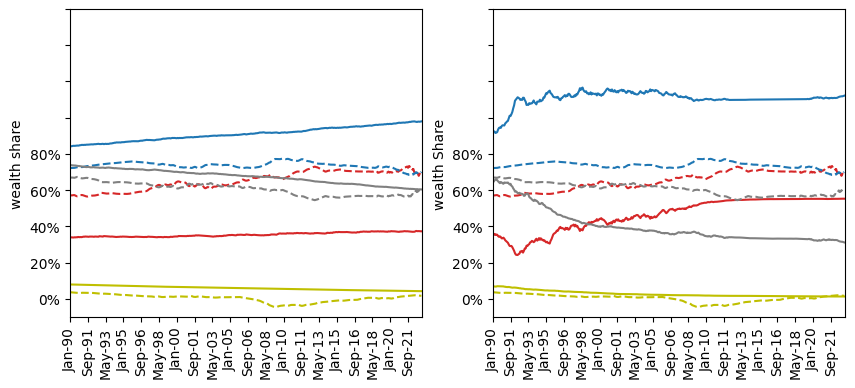

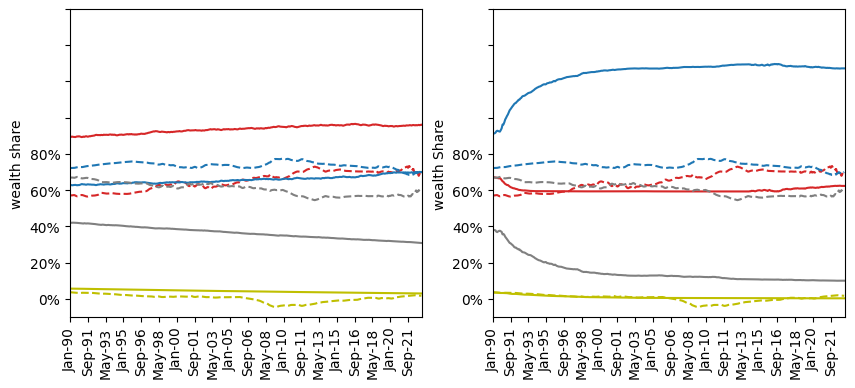

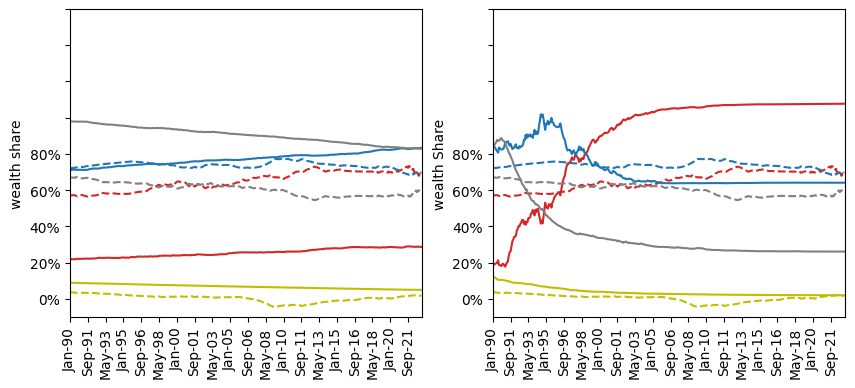

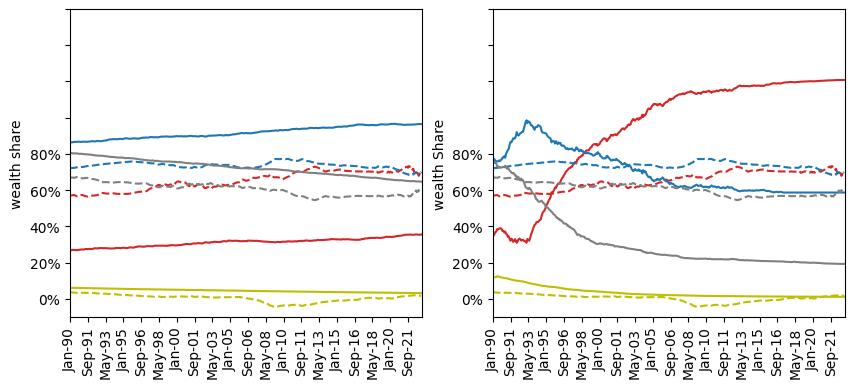

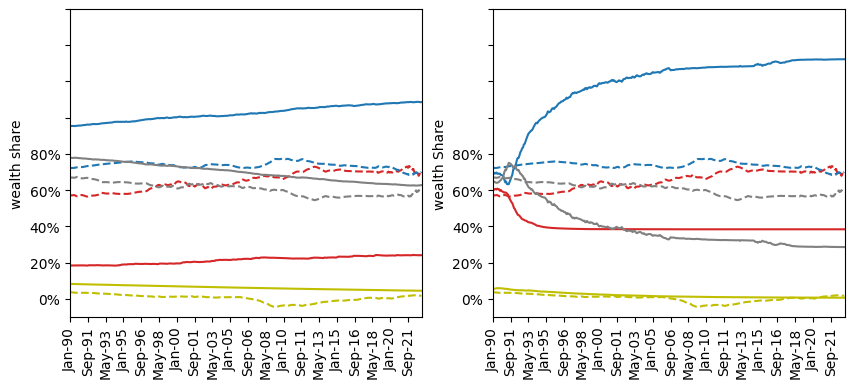

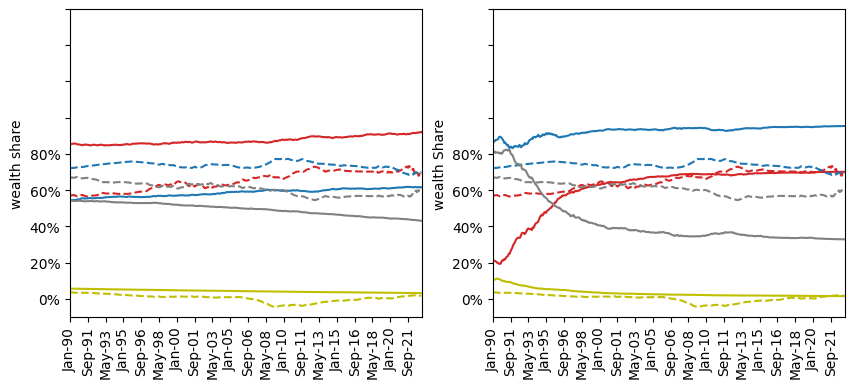

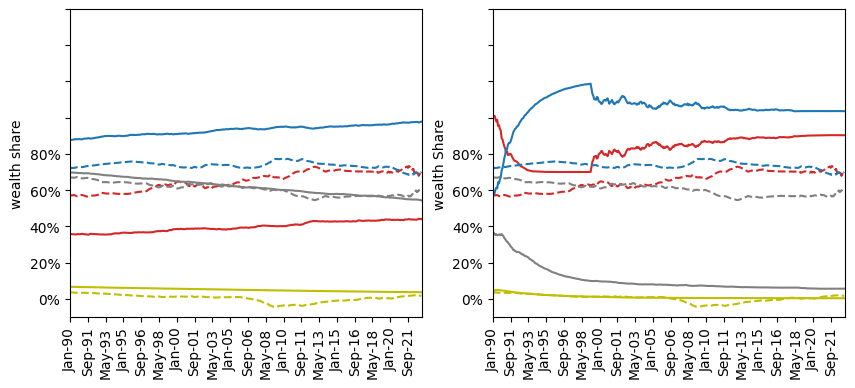

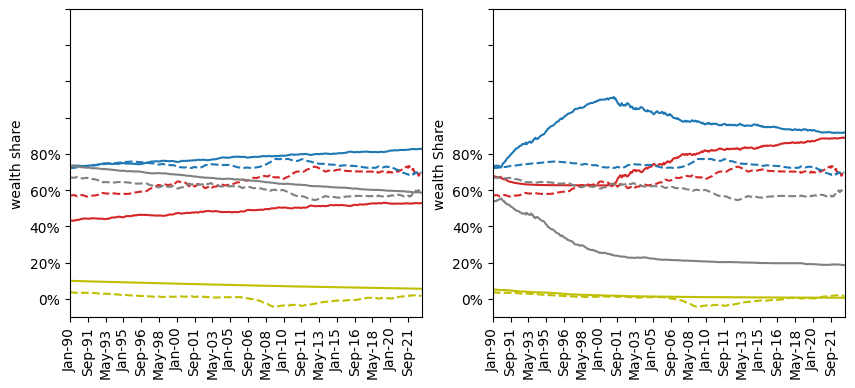

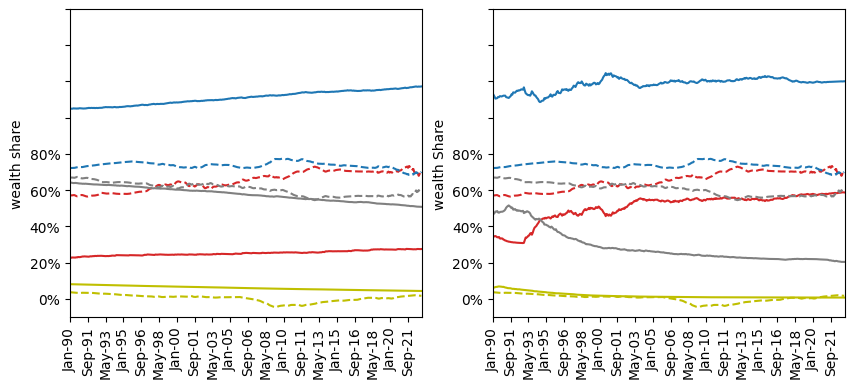

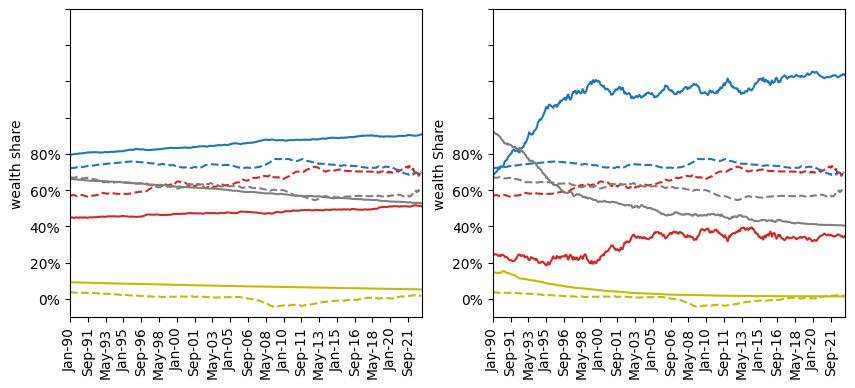

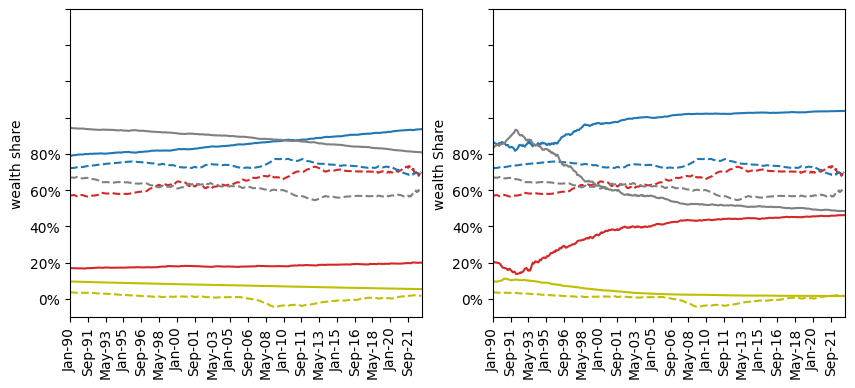

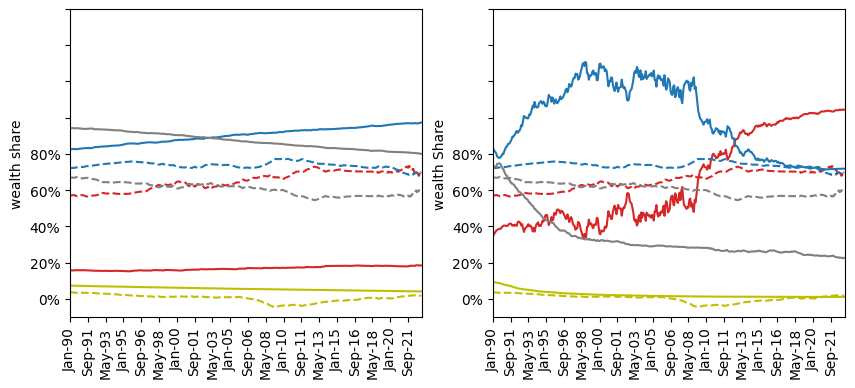

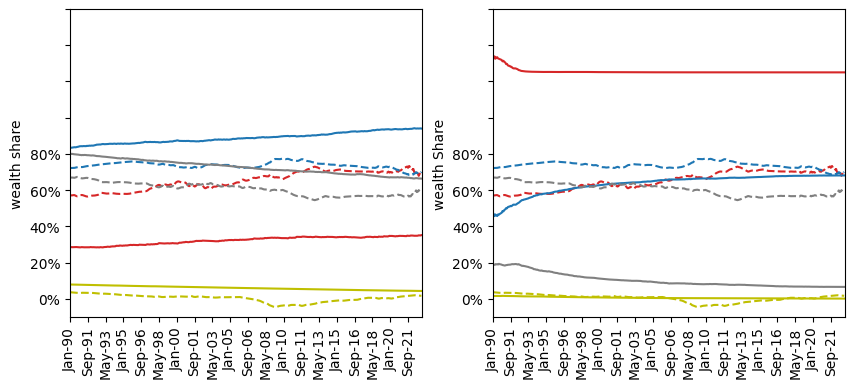

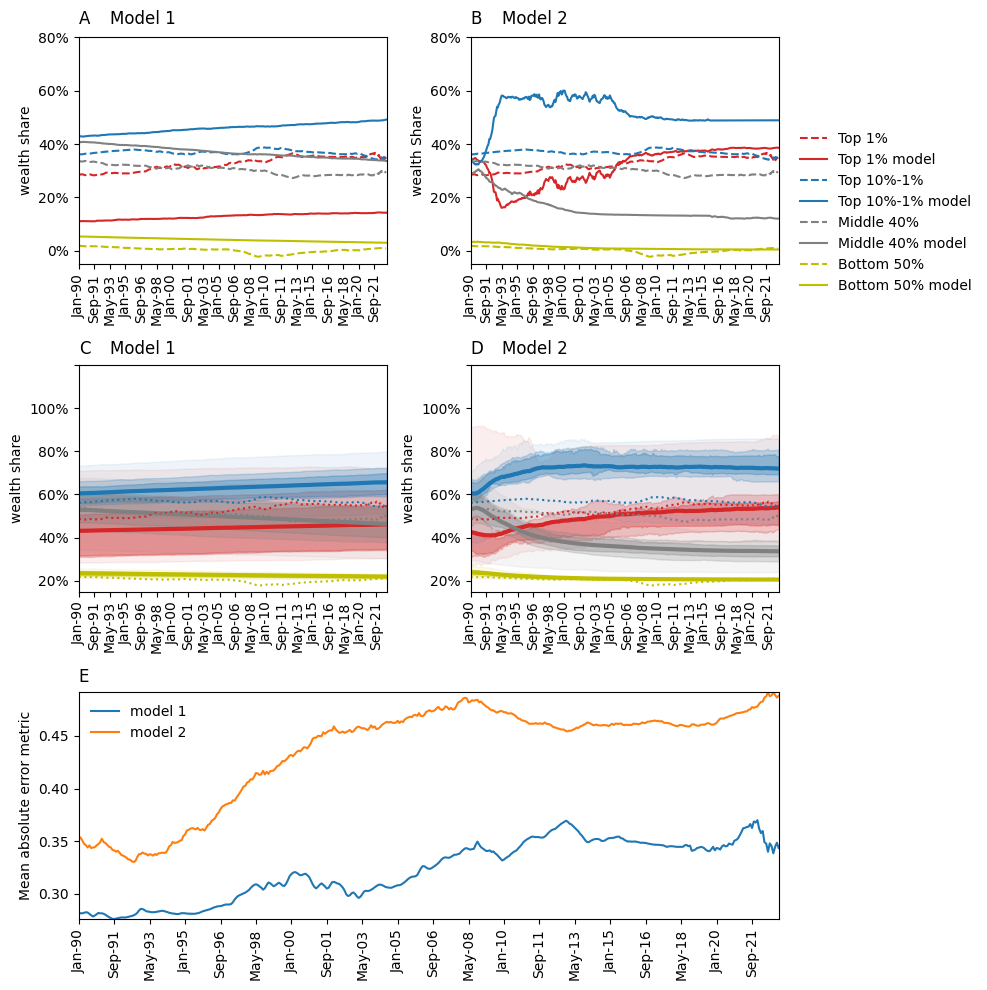

In [1]:
#General packages
import os
import numpy as np
from tqdm import tqdm  ### package for progress bars
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
### MODEL 1 infrastructure
from model1_class import Model1
from run_enkf import *
### MODEL 2 infrastructure
from model2_class import Model2
import pandas as pd
from benchmarking_error_simple import benchmarking_error_simple

#%% benchmarking fangraph of both models 

start_year = 1990
end_year = 2022

# Define the period length should be end_year + 1 because you want to include start and final year in the period
period_length = ((end_year+1)-start_year)*12
print("period length is ", period_length)

model_params1 = {"population_size": 100,
                "growth_rate": 0.025,
                "b_begin": 1.3,
                "distribution": "exponential_pareto", # either "Pareto_lognormal" or "exponential_pareto"
                "start_year": start_year,
                "uncertainty_para": 0.1}

model_params2 = {"population_size": 100, 
                "concavity": 1,
                "growth_rate": 0.025, 
                "distribution": "exponential_pareto", # either "Pareto_lognormal" or "exponential_pareto"
                "start_year": start_year,
                "adaptive_sensitivity": 0.02,
                "uncertainty_para": 0}


### set filter frequency so high that it is not used

enkf1 = prepare_enkf(Model1, model_params1, uncertainty_obs = 0.5, ensemble_size=30, macro_state_dim=4, filter_freq=1000)
enkf2 = prepare_enkf(Model2, model_params2, uncertainty_obs = 0.5, ensemble_size=30, macro_state_dim=4, filter_freq=1000)
run_enkf(enkf1, start_year, end_year, filter_freq = 1000)
run_enkf(enkf2, start_year, end_year, filter_freq = 1000)

#### RUN BENCHMARK CLASS FROM ABOVE WHICH IS DIFFERENT FROM THE PREPARE ENKF 
benchmark = benchmarking_error_simple(30, distribution_model1 = "exponential_pareto", distribution_model2 = "exponential_pareto")
benchmark.collect_data(start_year, end_year)
benchmark.compute_error(start_year=start_year, end_year=end_year)   

# Now let's say you want to integrate this into another grid layout
fig = plt.figure(figsize=(10, 10))
# Create a gridspec object
gs = gridspec.GridSpec(3, 2, height_ratios=[1, 1, 1])
# Create individual subplots
ax0 = plt.subplot(gs[0, 0])
ax1 = plt.subplot(gs[0, 1])
ax2 = plt.subplot(gs[1, 0])
ax3 = plt.subplot(gs[1, 1])
ax4 = plt.subplot(gs[2, :])  # This one spans both columns


enkf1.models[0].plot_wealth_groups_over_time(ax0, start_year, end_year)
enkf2.models[0].plot_wealth_groups_over_time(ax1, start_year, end_year)
enkf1.plot_fanchart(ax2)
enkf2.plot_fanchart(ax3)
benchmark.plot_graph(ax4)

###EXTRAS
#AX0
ax0.text(0,0.85, 'A', fontsize = 12)
ax0.text(40,0.85, 'Model 1', fontsize = 12)

#AX1
ax1.legend(loc=(1.05, -0.15), frameon = False)
ax1.text(0,0.85, 'B', fontsize = 12)
ax1.text(40,0.85, 'Model 2', fontsize = 12)

#AX2
ax2.text(0,1.05, 'C', fontsize = 12)
ax2.set_yticklabels(['0%', '20%', '40%', '60%', '80%', '100%'])
ax2.text(40,1.05, 'Model 1', fontsize = 12)

#AX3
ax3.set_yticklabels(['0%', '20%', '40%', '60%', '80%', '100%'])
ax3.text(0,1.05, 'D', fontsize = 12)
ax3.text(40, 1.05, 'Model 2', fontsize = 12)

#AX4
# Get the limits
x_min, x_max = ax4.get_xlim()
y_min, y_max = ax4.get_ylim()
ax4.text(0,y_max+0.01, 'E', fontsize = 12)
plt.tight_layout()
plt.savefig('fig2.png', dpi = 300)
plt.show()